In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Project Workflow

1. Data Collection
2. Exploratory Data Aanalysis (EDA)
3. Data Preprocessing
4. Train Test Split
5. ML Models
6. Providing Unknown Data
7. Getting Best Trained Model
8. Prediction 

# Import libraries 

In [2]:
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [70]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

# Load Data 

In [4]:
Data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
Data.shape

(7043, 21)

In [6]:
# Display all columns 
pd.set_option('display.max_column', None)

In [7]:
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Information about the data 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Drop "customer_ID" column (Not necessary for modelling)

Data = Data.drop("customerID", axis = 1)
Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
Data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Unique values from all the features 

Num_col = ["tenure", "MonthlyCharges", "TotalCharges"]


# Only categorical features unique values were display
for col in Data.columns:
    if col not in Num_col:
        print(f"Columns: {col}")
        print("Unique Values:",Data[col].unique())
        print("-" * 60)

Columns: gender
Unique Values: ['Female' 'Male']
------------------------------------------------------------
Columns: SeniorCitizen
Unique Values: [0 1]
------------------------------------------------------------
Columns: Partner
Unique Values: ['Yes' 'No']
------------------------------------------------------------
Columns: Dependents
Unique Values: ['No' 'Yes']
------------------------------------------------------------
Columns: PhoneService
Unique Values: ['No' 'Yes']
------------------------------------------------------------
Columns: MultipleLines
Unique Values: ['No phone service' 'No' 'Yes']
------------------------------------------------------------
Columns: InternetService
Unique Values: ['DSL' 'Fiber optic' 'No']
------------------------------------------------------------
Columns: OnlineSecurity
Unique Values: ['No' 'Yes' 'No internet service']
------------------------------------------------------------
Columns: OnlineBackup
Unique Values: ['Yes' 'No' 'No internet ser

In [12]:
Data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Empty values in "TotalCharges" column
Data[Data["TotalCharges"] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
len(Data[Data["TotalCharges"] == ' '])

11

In [15]:
# Replace the empty value 
Data["TotalCharges"] = Data["TotalCharges"].replace({' ': '0.0'})

In [16]:
# Convert "TotalCharges" column into "float"
Data["TotalCharges"] = Data["TotalCharges"].astype(float)

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
# Distribution of Target column¶
Data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**Observation**
1. Customer ID removed as it is not required for modelling.
2. No missing values in the dataset.
3. Missing values in the TotalCharges column were replaced with 0.
4. Class imbalance identified in  the target.

# Explortory Data Analysis (EDA)

In [19]:
Data.shape

(7043, 20)

In [20]:
Data.columns 

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
Data.describe()  # Only work on numerical features

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Numerical features analysis 

### Histogram plot

In [23]:
def plot_histogram(df, column_name):
    plt.figure(figsize = (5, 3))
    sns.histplot(df[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")
    
    # Calculate mean and median values for the features
    mean_col = df[column_name].mean()
    median_col = df[column_name].median()

    # Add vertical lines for mean and median 
    plt.axvline(mean_col, color = 'red', linestyle = "--", label = "Mean")
    plt.axvline(median_col, color = 'green', linestyle = "-", label = "Median")

    plt.legend()
    plt.show()

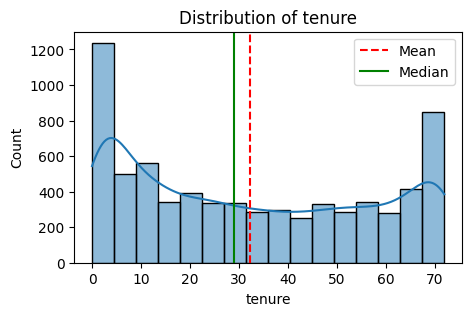

In [24]:
plot_histogram(Data, "tenure")

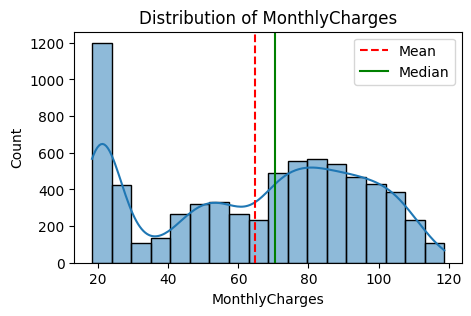

In [25]:
plot_histogram(Data, "MonthlyCharges")

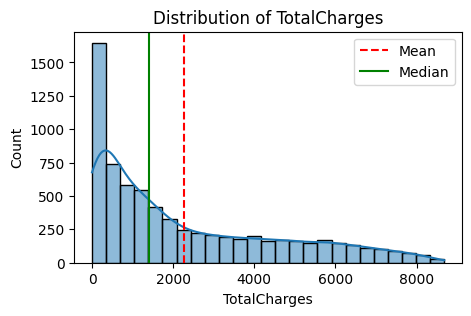

In [26]:
plot_histogram(Data, "TotalCharges")

### Box plot 

In [27]:
def plot_boxplot(df, column_name):
    plt.figure(figsize = (5, 3))
    sns.boxplot(y = df[column_name])
    plt.title(f"Distribution of {column_name}")
    plt.ylabel(column_name)
    plt.show()

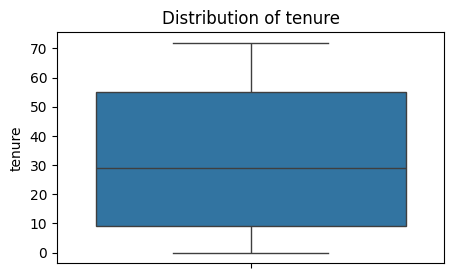

In [28]:
plot_boxplot(Data, "tenure")

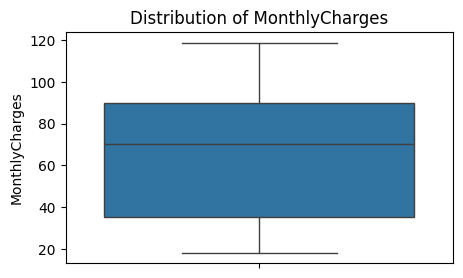

In [29]:
plot_boxplot(Data, "MonthlyCharges")

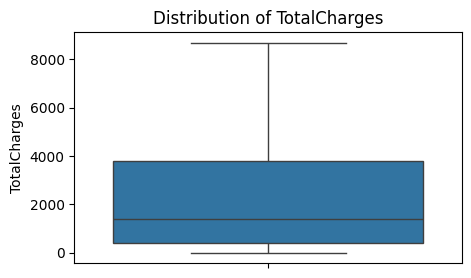

In [30]:
plot_boxplot(Data, "TotalCharges")

### Correlation heatmap

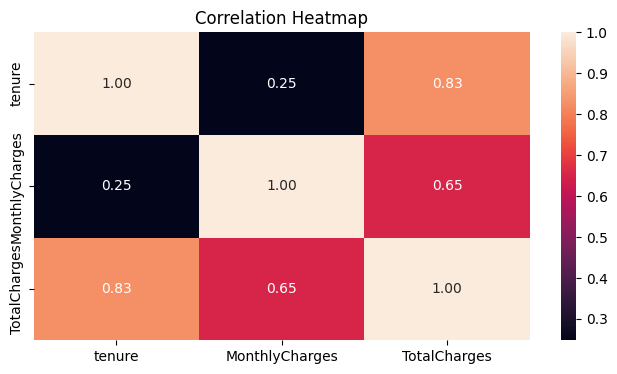

In [31]:
plt.figure(figsize = (8, 4))
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(Data[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot = True, fmt = ".2f" )
plt.title(f"Correlation Heatmap")
plt.show()

**Observation**:-

-  Highly related features are `tenure` and `TotalCharges` with **0.83** %.
- `MonthlyCharges` and `TotalCharges` both numerical features have good relation with **0.65** %.
-  Lower related features are `MonthlyCharges` and `tenure` with **0.25** %.
  

# Categorical features analysis

In [32]:
Data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Countplot 

In [33]:
Cat_cols = Data.select_dtypes(include = "object").columns.to_list()

# Adding "senior citizen" feature in cat_cols.
Cat_cols = ["SeniorCitizen"] + Cat_cols

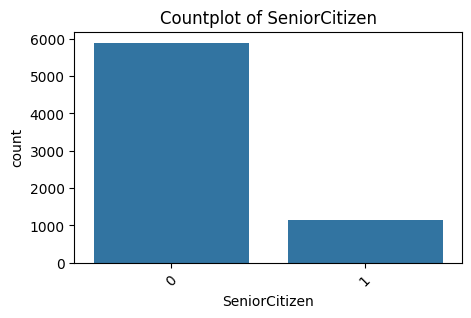

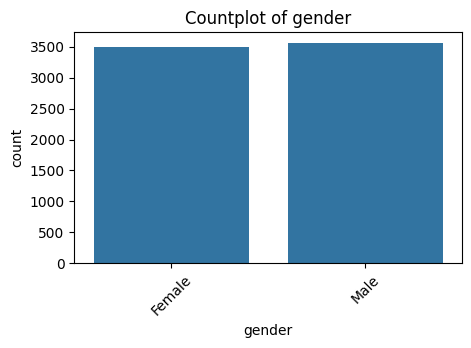

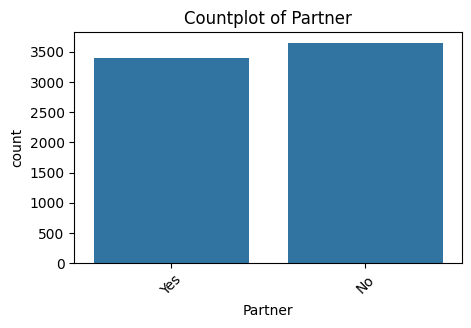

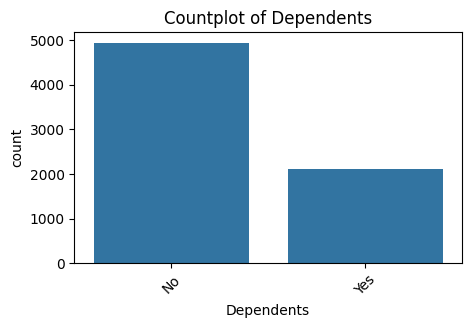

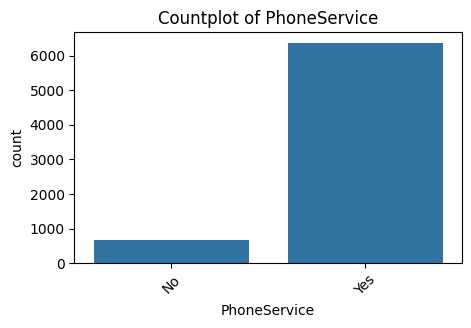

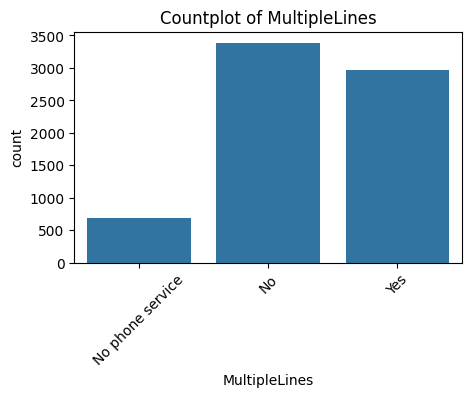

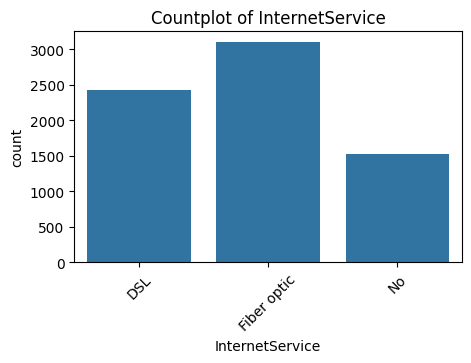

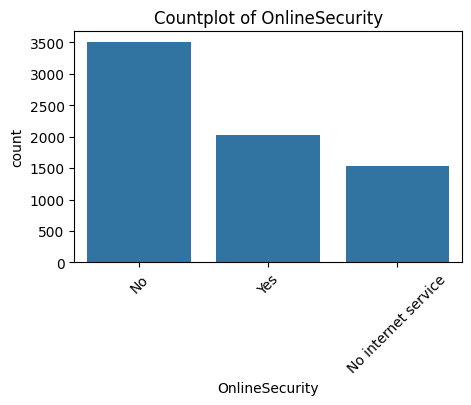

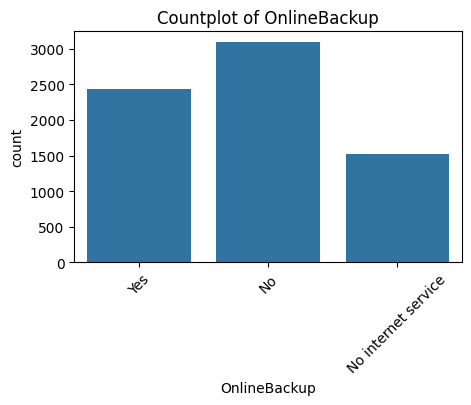

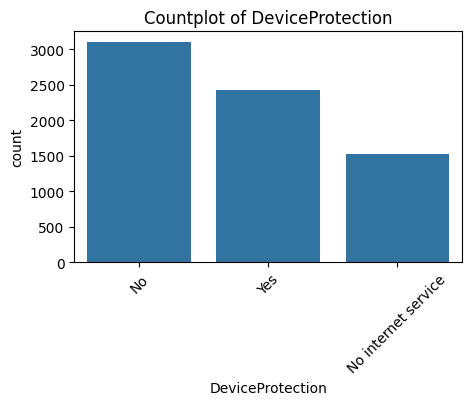

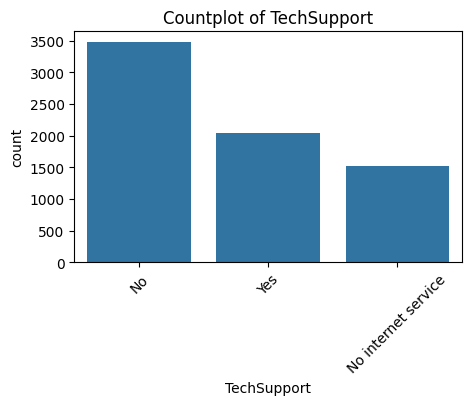

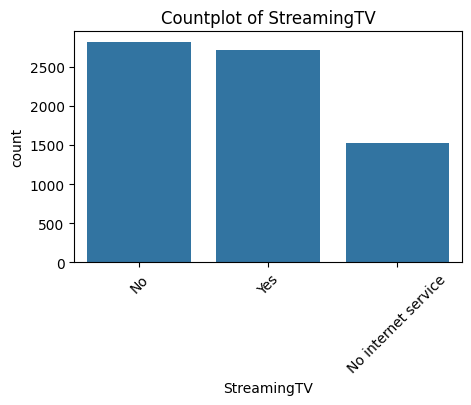

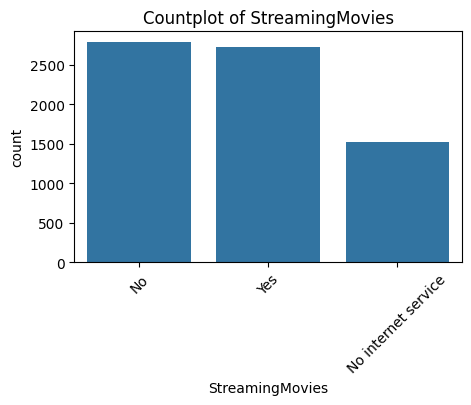

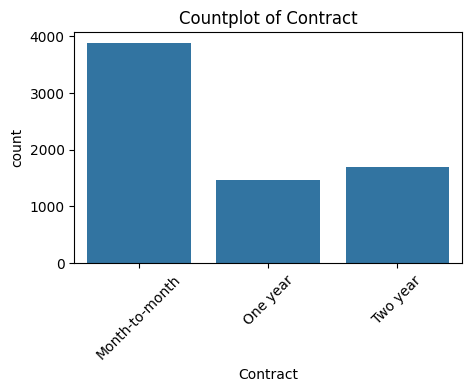

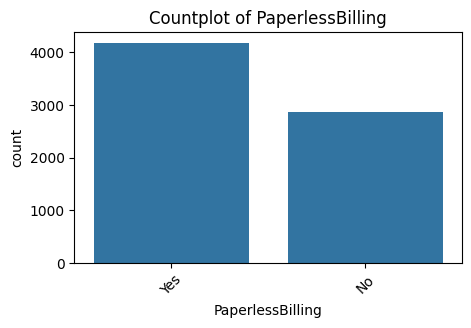

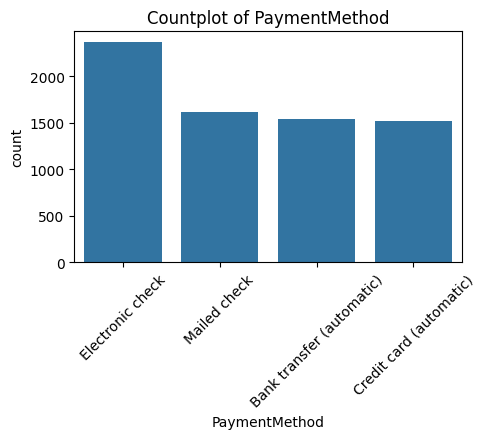

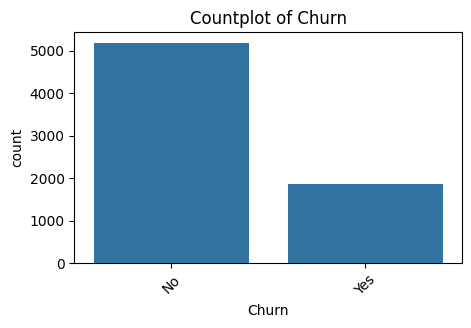

In [34]:
for col in Cat_cols:
    plt.figure(figsize = (5, 3))
    sns.countplot(x = Data[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Data Preprocessing 

In [35]:
Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Label Encoding - Target column 

In [36]:
Data["Churn"] = Data["Churn"].replace({"Yes": 1, "No": 0})

/tmp/ipykernel_55/2108779350.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data["Churn"] = Data["Churn"].replace({"Yes": 1, "No": 0})


In [37]:
# Check 
Data["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## Label Encoding - Categorical features

In [38]:
Data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
# Identifying features with "object" data type 
Cat_cols = Data.select_dtypes(include = "object").columns

In [40]:
# Inititalize a dictionary to save the encoders
encoders = {}

for col in Cat_cols:
    label_encoder = LabelEncoder()
    Data[col] = label_encoder.fit_transform(Data[col])
    encoders[col] = label_encoder


# Save the encoders to pickle file 
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [41]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [42]:
Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Train and Test data split 

In [43]:
# Seperate features into a independent and dependent 
X = Data.drop(columns = ["Churn"], axis = 1)
y = Data["Churn"]

In [44]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [45]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
print(f"X_train shape: ",X_train.shape)
print(f"X_test shape: ", X_test.shape)
print(f"y_train shape: ", y_train.shape)
print(f"y_test shape: ", y_test.shape)

X_train shape:  (5634, 19)
X_test shape:  (1409, 19)
y_train shape:  (5634,)
y_test shape:  (1409,)


In [48]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0.00


In [49]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,24.80
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,996.45
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,1031.70
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,76.35
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,3260.10


## Synthetic Minority Oversampling Technique (SMOTE)

In [50]:
smote = SMOTE(random_state = 42)

In [51]:
# Only apply on training dataset not on testing dataset 
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [52]:
print(f"X_train_smote shape: ", X_train_smote.shape)
print(f"y_train_smote shape: ", y_train_smote.shape)

X_train_smote shape:  (8276, 19)
y_train_smote shape:  (8276,)


In [53]:
X_train_smote.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80
1,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45
2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45
3,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95
4,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0.00


In [54]:
y_train_smote.head()

0    0
1    0
2    1
3    1
4    0
Name: Churn, dtype: int64

# Baseline Model Training 

In [55]:
# Training with default parameters 

models = {
    
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=2000))
    ]),

    
    "SGD Classifier": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SGDClassifier(random_state=42))
    ]),
    
    "Decision Tree": DecisionTreeClassifier(random_state = 42),
    
    "Random Forest": RandomForestClassifier(random_state = 42),
    
    "Exter Trees": ExtraTreesClassifier(random_state = 42),
    
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    
    "AdaBoost": AdaBoostClassifier(random_state=42),
    
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier())
    ]),
    
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(probability=True, random_state=42))
    ]),

    
    "XGBoost": XGBClassifier(
        random_state = 42, 
        eval_metric = "logloss", 
        use_label_encoder = False)
}

## Baseline Training & Accuracy Comparison

In [56]:
Baseline_results = []

for model_name, model in models.items():
    print(f"Training {model_name} (Baseline)")

    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)


    acc = accuracy_score(y_test, y_pred)

    # Adding model name and accuracy
    Baseline_results.append({
        "Model": model_name,
        "Accuracy": acc
    })

    # Store results into a datarfame
    Baseline_df = pd.DataFrame(Baseline_results).sort_values(by = "Accuracy", ascending = False)



Baseline_df

Training Logistic Regression (Baseline)
Training SGD Classifier (Baseline)
Training Decision Tree (Baseline)
Training Random Forest (Baseline)
Training Exter Trees (Baseline)
Training Gradient Boosting (Baseline)
Training AdaBoost (Baseline)
Training KNN (Baseline)
Training SVM (Baseline)
Training XGBoost (Baseline)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:59:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy
9,XGBoost,0.782115
8,SVM,0.782115
5,Gradient Boosting,0.779986
3,Random Forest,0.777147
4,Exter Trees,0.765791
6,AdaBoost,0.765082
0,Logistic Regression,0.764372
1,SGD Classifier,0.738822
2,Decision Tree,0.726047
7,KNN,0.701207


## Stratified K-Fold Cross-Validation

In [57]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store cross validation results 
cv_scores = {}

# Perform 5-fold cross validation for each model 
for model_name, model in models.items():
    print(f"Training {model_name} with Stratified K-Fold CV")

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("model", model)
    ])if model_name in ["Logistic Regression", "SGD Classifier", "KNN", "SVM"] else Pipeline([
        ("smote", SMOTE(random_state=42)),
        ("model", model)
    ])

        
    scores = cross_val_score(
        pipeline, 
        X_train, 
        y_train, 
        cv = skf, 
        scoring = "accuracy")
    
    cv_scores[model_name] = scores 
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.4f}")
    print("-" * 75)

Training Logistic Regression with Stratified K-Fold CV
Logistic Regression cross-validation accuracy: 0.7453
---------------------------------------------------------------------------
Training SGD Classifier with Stratified K-Fold CV
SGD Classifier cross-validation accuracy: 0.7224
---------------------------------------------------------------------------
Training Decision Tree with Stratified K-Fold CV
Decision Tree cross-validation accuracy: 0.7160
---------------------------------------------------------------------------
Training Random Forest with Stratified K-Fold CV
Random Forest cross-validation accuracy: 0.7762
---------------------------------------------------------------------------
Training Exter Trees with Stratified K-Fold CV
Exter Trees cross-validation accuracy: 0.7602
---------------------------------------------------------------------------
Training Gradient Boosting with Stratified K-Fold CV
Gradient Boosting cross-validation accuracy: 0.7716
--------------------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:00:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:00:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:00:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:00:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost cross-validation accuracy: 0.7673
---------------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:00:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### CV Results as DataFrame

In [58]:
cv_results_df = pd.DataFrame({
    model: scores.mean()
    for model, scores in cv_scores.items()}.items(), columns = ["Model", "CV Accuracy"]).sort_values(
    by = "CV Accuracy", ascending = False
)

cv_results_df

,Model,CV Accuracy
3,Random Forest,0.776183
5,Gradient Boosting,0.771568
9,XGBoost,0.767309
4,Exter Trees,0.760210
8,SVM,0.755060
6,AdaBoost,0.754526
0,Logistic Regression,0.745300
1,SGD Classifier,0.722402
2,Decision Tree,0.716009
7,KNN,0.686905


### **Observations from Model CV Accuracy Results**:-

- **Top performers**: Ensemble-based models excelled, with `Random Forest` leading at 77.62% accuracy, closely trailed by `Gradient Boosting` (77.16%) and `XGBoost` (76.73%).

- **Mid-Tier Contenders**: `Extra Trees` (76.02%) and `SVM` (75.51%) followed, showing solid generalization, `AdaBoost` (75.45%) also performed well.

- **Under performers**: Linear and simpler models lagged, including `Logistic Regression` (74.53%), `SGD Classifier` (72.24%), `Decision Tree` (71.60%), and `KNN` (68.69%).

# Hyperparameter Tuning Code (Production-Grade)

###  Top 3 models 
####  1. `RandomForest` - (RandomizedSearchCV)
####  2. `GradientBoosting` - (RandomizedSearchCV)
####  3. `XGBoost` - (RandomizedSearchCV)

# RandomForest - (RandomizedSearchCV)

In [73]:
rf_pipeline = Pipeline([
    ("smote", SMOTE(random_state = 42)),
    ("rf", RandomForestClassifier(random_state = 42))
])


# Params store in dict 
rf_param_dict = {
    "rf__n_estimators": [100, 200, 300],
    "rf__max_depth": [None, 10, 20, 30],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4],
    "rf__max_features": ["sqrt", "log2"]
}


# Apply randomzedsearchCV 
rf_search = RandomizedSearchCV(
    rf_pipeline,
    rf_param_dict,
    n_iter = 20,
    cv = skf,
    scoring = "roc_auc",
    n_jobs = -1,
    random_state = 42,
    verbose = 1
)

# Fit the model 
rf_search.fit(X_train, y_train)



print("Best RF Score:", rf_search.best_score_)
print("Best RF Params: ",rf_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF Score: 0.8310079415637757
Best RF Params:  {'rf__n_estimators': 200, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_features': 'sqrt', 'rf__max_depth': 10}


# GradientBoosting - (RandomizedSearchCV)

In [74]:
gb_pipeline = Pipeline([
    ("smote", SMOTE(random_state = 42)),
    ("gb", GradientBoostingClassifier(random_state = 42))
])


# Params store in dict 
gb_param_dist = {
    "gb__n_estimators": [100, 200, 300],
    "gb__learning_rate": [0.01, 0.05, 0.1],
    "gb__max_depth": [3, 5, 7],
    "gb__subsample": [0.8, 1.0]
}


# Apply randomzedsearchCV 
gb_search = RandomizedSearchCV(
    gb_pipeline,
    gb_param_dist,
    n_iter=20,
    cv=skf,
    scoring="roc_auc",
    n_jobs=-1,
    random_state = 42,
    verbose=1
)


# Fit the model 
gb_search.fit(X_train, y_train)


print("Best GB Score: ", gb_search.best_score_)
print("Best GB Params: ", gb_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best GB Score:  0.8316182704711105
Best GB Params:  {'gb__subsample': 0.8, 'gb__n_estimators': 100, 'gb__max_depth': 5, 'gb__learning_rate': 0.05}


# XGBoost - (RandomizedSearchCV)

In [75]:
xgb_pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("xgb", XGBClassifier(
        random_state=42,
        eval_metric="logloss"
    ))
])


# Params store in dict 
xgb_param_dist = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.05, 0.1],
    "xgb__subsample": [0.8, 1.0],
    "xgb__colsample_bytree": [0.8, 1.0]
}


# Apply randomzedsearchCV 
xgb_search = RandomizedSearchCV(
    xgb_pipeline,
    xgb_param_dist,
    n_iter=20,
    cv=skf,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42,
    verbose=1
)


# Fit the model 
xgb_search.fit(X_train, y_train)

print("Best XGB Score:", xgb_search.best_score_)
print("Best XGB Params:", xgb_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGB Score: 0.8328800721555755
Best XGB Params: {'xgb__subsample': 0.8, 'xgb__n_estimators': 300, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.01, 'xgb__colsample_bytree': 0.8}


# Compare Tuned Models 

In [77]:
tuned_results = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "XGBoost"],
    "CV Accuracy": [
        rf_search.best_score_,
        gb_search.best_score_,
        xgb_search.best_score_
    ]
}).sort_values(by = "CV Accuracy", ascending = False)

In [78]:
tuned_results

,Model,CV Accuracy
2,XGBoost,0.832880
1,Gradient Boosting,0.831618
0,Random Forest,0.831008


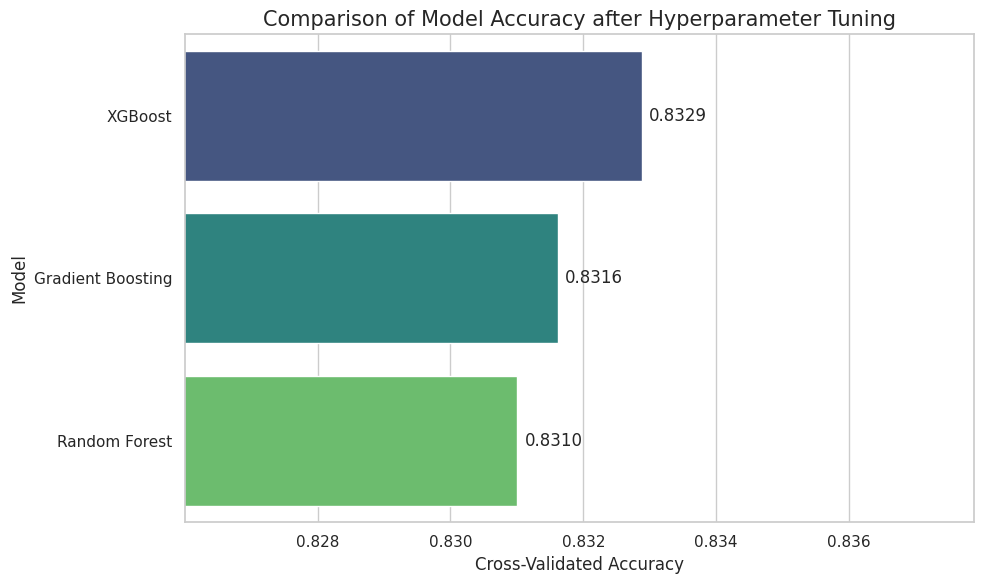

In [80]:
# Set the visual style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the barplot
ax = sns.barplot(x="CV Accuracy", y="Model", data=tuned_results, palette="viridis", hue="Model", legend=False)

# Add titles and labels
plt.title("Comparison of Model Accuracy after Hyperparameter Tuning", fontsize=15)
plt.xlabel("Cross-Validated Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)


# This helps visualize small gaps between 0.831 and 0.832
plt.xlim(tuned_results["CV Accuracy"].min() - 0.005, tuned_results["CV Accuracy"].max() + 0.005)

# Add the actual score labels on the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', padding=5)

plt.tight_layout()
plt.show()

### **Observations**:-

- **XGBoost Emerges as the Winner:** After fine-tuning parameters like learning rate, depth, and estimators, `XGBoost` achieved the highest accuracy of `83.29%`.

- **The Baseline vs. Tuned Shift:** In your baseline tests, `Random Forest` likely performed better "out of the box" because it is generally more robust to default parameters. However, `XGBoost` is known for having a **higher performance** ceiling, which you successfully unlocked through hyperparameter tuning.

- **Competitive Margin:** The performance gap between the three models is quite narrow (less than `0.2%` difference).

# Model Evaluation 

------------ Final XGBoost Evaluation (Tuned) ---------------
Test Accuracy: 0.7736

Confusion Matrix:


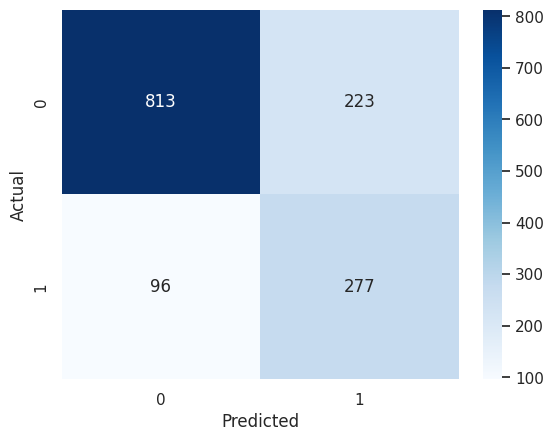


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.84      1036
           1       0.55      0.74      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.74      1409
weighted avg       0.80      0.77      0.78      1409



In [81]:
# Select the best model from the search
best_model = xgb_search.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_model.predict(X_test)
y_prob_xgb = best_model.predict_proba(X_test)[:, 1]

# Comprehensive Evaluation
print("------------ Final XGBoost Evaluation (Tuned) ---------------")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

In [82]:
# save trained model as pickle file 
model_data = {"model": xgb_search.best_estimator_, "feature_name":X.columns.tolist()}

with open("Telco_customer_churn_train_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

# Test Model

In [83]:
with open("Telco_customer_churn_train_model.pkl", "rb") as f:
    model_data = pickle.load(f)

    loaded_model = model_data["model"]
    feature_names = model_data["feature_name"]

In [84]:
loaded_model

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [85]:
feature_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [90]:
# Store input data into a dictionary 
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 1,
    'Partner': 'No' ,
    'Dependents': 'No',
    'tenure': 2,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 85.65,
    'TotalCharges': 171.30
}

# Convert dict into a dataframe 
input_data_df = pd.DataFrame([input_data])


with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)


for col, encoder in encoders.items():
    input_data_df[col] = encoder.transform(input_data_df[col])

In [91]:
print(input_data_df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              1        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            2                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           85.65         171.3  


In [92]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [93]:
# Prediction 
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)
print(prediction)


# Result 
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")

[1]
Prediction: Churn
Prediction Probability: [[0.1300736 0.8699264]]


### **Observation**:-
- There are `0.13` chance for the `No Churn` and `0.86` for `Churn`.